In [141]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# 데이터 가져오기

## MySQL 연동

In [21]:
## mysql 연결
# conn = pymysql.connect(
#     config
# )
# curs = conn.cursor()
# sql = f'SELECT * FROM USER_TB LIMIT 0, 1'
# curs.execute(sql)
# rows = curs.fetchall()

## CSV 가져오기

In [47]:
df_all = pd.read_csv(
    './USER_TB.csv', 
    low_memory=False,
    dtype={
        'user_kakao_id': object,
        'user_phone': object
    }
)

# 데이터 처리

## 데이터 전체 정보

In [42]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067369 entries, 0 to 1067368
Data columns (total 66 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Unnamed: 0                         1067369 non-null  int64  
 1   user_id                            1067369 non-null  int64  
 2   user_email                         584341 non-null   object 
 3   user_pwd                           584731 non-null   object 
 4   user_pwd_salt                      584731 non-null   object 
 5   user_kakao_id                      520871 non-null   float64
 6   user_apple_id                      26915 non-null    object 
 7   user_name                          1067369 non-null  object 
 8   user_phone                         1067343 non-null  float64
 9   user_birth                         1067369 non-null  object 
 10  user_gender                        1067369 non-null  int64  
 11  user_prf_img_url        

## 필요없는 데이터 제거

In [48]:
# 필요없는 데이터 제거
df_all.drop(
    ['Unnamed: 0', 'user_pwd', 'user_pwd_salt', 'user_prf_img_url', 'user_jwt', 'user_staff_jwt', 'user_ci', 'user_di', 'user_push_id', 'user_deerman_push_id', 'user_app_version', 'user_code_push_version', 'user_lat', 'user_lng'],
    axis=1,
    inplace=True
)

# 데이터 핸들링 및 시각화

## 가입자 나이 분포도

In [57]:
df_user_birth = df_all[['user_birth']]

In [61]:
df_birth = df_user_birth.apply(lambda x: x.str[:4], axis=1)

### 전체 분포도

<AxesSubplot:title={'center':'User Numbers By Birth'}, xlabel='Birth', ylabel='User Numbers'>

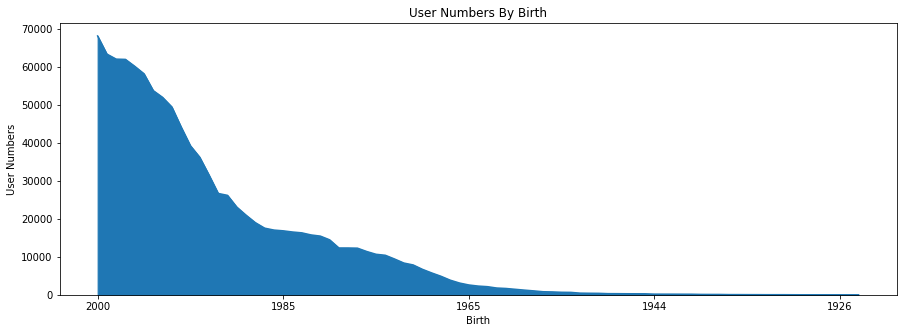

In [173]:
df_birth['user_birth'].value_counts().plot(
    kind='area', 
    figsize=(15, 5), 
    title='User Numbers By Birth', 
    xlabel='Birth', 
    ylabel='User Numbers'
)

MZ세대(1985~2000년대생)의 사용률이 높음

### 10대, 20대, 30대.. 별 분포도

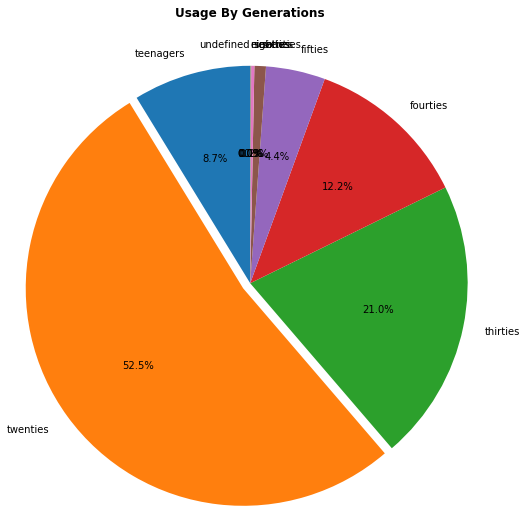

In [176]:
birth_dict = df_birth['user_birth'].value_counts().to_dict()
THIS_YEAR = datetime.now().year

# 나이 확인하는 함수
def get_generation(birth):
    return THIS_YEAR - int(birth)

generation_dict = {
    'teenagers': 0,
    'twenties': 0,
    'thirties': 0,
    'fourties': 0,
    'fifties': 0,
    'sixties': 0,
    'seventies': 0,
    'eighties': 0,
    'nineties': 0,
    'undefined': 0
}
for year, count in birth_dict.items():
    age = get_generation(year)
    if age < 20:
        generation_dict['teenagers'] += count
    elif age < 30:
        generation_dict['twenties'] += count
    elif age < 40:
        generation_dict['thirties'] += count
    elif age < 50:
        generation_dict['fourties'] += count
    elif age < 60:
        generation_dict['fifties'] += count
    elif age < 70:
        generation_dict['sixties'] += count
    elif age < 80:
        generation_dict['seventies'] += count
    elif age < 90:
        generation_dict['eighties'] += count
    elif age < 100:
        generation_dict['nineties'] += count
    else:
        generation_dict['undefined'] += count

df_generation = pd.DataFrame(list(generation_dict.items()), columns=['generation', 'count'])

explodes =(0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(
    df_generation['count'], 
    labels=df_generation['generation'],
    startangle=90,
    autopct='%1.1f%%',
    radius=2.5,
    explode=explodes
)
plt.title('Usage By Generations', x=0.5, y=1.7, fontweight="bold")
plt.show()

주요 고객은 20대 및 30대

### 20대 및 30대의 정확한 나이대 분포도

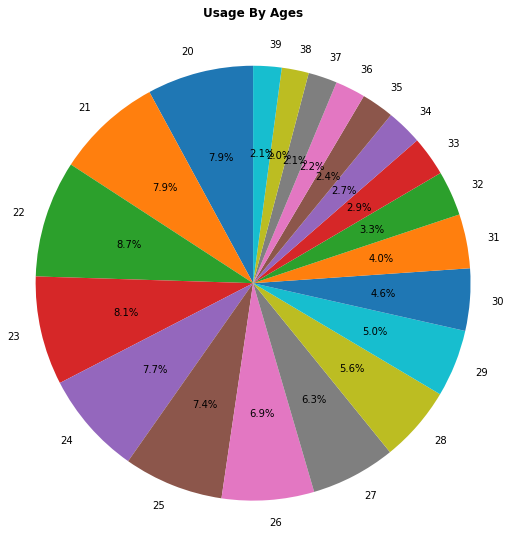

In [197]:
def get_age(year):
    return THIS_YEAR - int(year)

# 주요고객 설정(변동가능)
age_gap = [20, 40]
age_dict = {}
for year, count in birth_dict.items():
    real_age = get_age(year)
    if real_age >= age_gap[0] and real_age < age_gap[-1]:
        if age_dict.get(real_age):
            age_dict[real_age] += count
        else:
            age_dict[real_age] = count

age_dict = dict(sorted(age_dict.items()))
df_ages = pd.DataFrame(list(age_dict.items()), columns=['ages', 'count'])

plt.pie(
    df_ages['count'], 
    labels=df_ages['ages'],
    startangle=90,
    autopct='%1.1f%%',
    radius=2.5,
)
plt.title('Usage By Ages', x=0.5, y=1.7, fontweight="bold")
plt.show()

In [ ]:
print('test')
print('test11')